In [2]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import numpy as np
from sklearn.model_selection import ShuffleSplit, cross_val_score
import joblib
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score


/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
Jung = pd.read_csv("/home/kumail/Energy_AI/Micro Palstic/Dataset/Jung et Dataset.csv")
Jung = Jung.drop(columns=['Turtle_piece.scan'])
Jung

,identified,4000,3999,3998,3997,3996,3995,3994,3993,3992,...,459,458,457,456,455,454,453,452,451,450
0,HDPE,99.51,99.51,99.51,99.51,99.51,99.50,99.50,99.50,99.50,...,96.83,96.84,96.85,96.83,96.77,96.66,96.54,96.46,96.43,96.44
1,PP,99.03,99.03,99.03,99.03,99.02,99.02,99.02,99.02,99.02,...,93.80,93.77,93.86,94.01,94.09,94.09,94.08,94.12,94.23,94.36
2,PP,99.23,99.22,99.22,99.21,99.21,99.20,99.20,99.21,99.21,...,93.98,94.00,94.05,94.09,94.14,94.23,94.38,94.57,94.75,94.87
3,Mixture,99.50,99.50,99.50,99.50,99.51,99.51,99.51,99.51,99.51,...,96.41,96.45,96.50,96.55,96.62,96.68,96.74,96.77,96.78,96.80
4,HDPE,99.55,99.56,99.56,99.57,99.57,99.57,99.56,99.56,99.56,...,95.28,95.22,95.23,95.30,95.38,95.41,95.35,95.24,95.21,95.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,PP,99.75,99.75,99.75,99.75,99.75,99.75,99.74,99.74,99.73,...,98.58,98.58,98.65,98.76,98.85,98.88,98.87,98.87,98.92,98.98
796,Mixture,99.62,99.62,99.62,99.63,99.63,99.63,99.63,99.63,99.63,...,97.02,97.08,97.16,97.23,97.27,97.30,97.32,97.34,97.39,97.47
797,Mixture,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.93,99.93,...,96.94,97.01,97.05,97.07,97.08,97.06,97.01,96.97,96.97,97.02
798,HDPE,99.58,99.58,99.58,99.58,99.58,99.58,99.58,99.58,99.57,...,94.32,94.38,94.46,94.51,94.52,94.52,94.53,94.51,94.42,94.31


In [4]:
Jung_counts = Jung['identified'].value_counts()
Jung_counts

identified
HDPE       438
PP         272
Mixture     39
LDPE        37
PS           7
Unknown      4
Nylon        1
PVC          1
PETE         1
Name: count, dtype: int64

In [ ]:
values_to_remove = ['Nylon', 'PVC', 'PETE']
Jung = Jung[~Jung['identified'].isin(values_to_remove)]
Jung['identified'] = Jung['identified'].replace('PS', 'Unknown')
Jung_counts = Jung['identified'].value_counts()
Jung_counts


/tmp/ipykernel_2977/3446870954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jung['identified'] = Jung['identified'].replace('PS', 'Unknown')


identified
HDPE       438
PP         272
Mixture     39
LDPE        37
Unknown     11
Name: count, dtype: int64

In [6]:
label_encoder = LabelEncoder()

# Fit and transform the 'Interpretation' column
Jung['identified_encoded'] = label_encoder.fit_transform(Jung['identified'])
Jung = Jung.drop(columns=['identified'])
Jung

/tmp/ipykernel_2977/1603336163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jung['identified_encoded'] = label_encoder.fit_transform(Jung['identified'])


,4000,3999,3998,3997,3996,3995,3994,3993,3992,3991,...,458,457,456,455,454,453,452,451,450,identified_encoded
0,99.51,99.51,99.51,99.51,99.51,99.50,99.50,99.50,99.50,99.51,...,96.84,96.85,96.83,96.77,96.66,96.54,96.46,96.43,96.44,0
1,99.03,99.03,99.03,99.03,99.02,99.02,99.02,99.02,99.02,99.02,...,93.77,93.86,94.01,94.09,94.09,94.08,94.12,94.23,94.36,3
2,99.23,99.22,99.22,99.21,99.21,99.20,99.20,99.21,99.21,99.22,...,94.00,94.05,94.09,94.14,94.23,94.38,94.57,94.75,94.87,3
3,99.50,99.50,99.50,99.50,99.51,99.51,99.51,99.51,99.51,99.51,...,96.45,96.50,96.55,96.62,96.68,96.74,96.77,96.78,96.80,2
4,99.55,99.56,99.56,99.57,99.57,99.57,99.56,99.56,99.56,99.56,...,95.22,95.23,95.30,95.38,95.41,95.35,95.24,95.21,95.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,99.75,99.75,99.75,99.75,99.75,99.75,99.74,99.74,99.73,99.73,...,98.58,98.65,98.76,98.85,98.88,98.87,98.87,98.92,98.98,3
796,99.62,99.62,99.62,99.63,99.63,99.63,99.63,99.63,99.63,99.64,...,97.08,97.16,97.23,97.27,97.30,97.32,97.34,97.39,97.47,2
797,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.93,99.93,99.93,...,97.01,97.05,97.07,97.08,97.06,97.01,96.97,96.97,97.02,2
798,99.58,99.58,99.58,99.58,99.58,99.58,99.58,99.58,99.57,99.57,...,94.38,94.46,94.51,94.52,94.52,94.53,94.51,94.42,94.31,0


In [7]:
X = Jung.drop(columns=['identified_encoded'])
Y = Jung['identified_encoded']

In [8]:
normalizer = Normalizer(norm='max')
data_scaled = normalizer.fit_transform(X)
pca = PCA(n_components=9)
data_pca = pca.fit_transform(data_scaled)

print(data_pca.shape)

# Check how much variance each component explains
print("Explained Variance Ratio of each principal component:")
print(pca.explained_variance_ratio_)

(797, 9)
Explained Variance Ratio of each principal component:
[0.49899195 0.282692   0.10894243 0.05868484 0.02262672 0.00786886
 0.00572934 0.00241824 0.00206183]


In [9]:
def split_and_scale_data(X, Y, test_size=0.2, random_state=42):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    
    
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    print(f"After preprocessing Training set size: {X_train.shape}")
    print(f"After preprocessing Test set size: {X_test.shape}")
    
    return X_train, X_test, Y_train,  Y_test
X_train_scaled,  X_test_scaled, Y_train,  Y_test = split_and_scale_data(data_pca, Y)

Training set size: 637
Test set size: 160
After preprocessing Training set size: (637, 9)
After preprocessing Test set size: (160, 9)


In [10]:
clf1 = ExtraTreesClassifier(
    n_estimators=500, max_depth=35, min_samples_split=7, min_samples_leaf=1, max_features='sqrt', random_state=42
)
clf2 = DecisionTreeClassifier(
    max_depth=15, min_samples_split=14, min_samples_leaf=5, criterion='entropy', random_state=42
)
clf3 = SVC(
    C=42.26721781758463, kernel='rbf', gamma='auto', probability=True, random_state=42
)
clf4 = xgb.XGBClassifier(
    n_estimators=900, max_depth=9, learning_rate=0.21577743453773293,
    subsample=0.7134596184717141, colsample_bytree=0.8926104458835206, 
    gamma=0.06934334083160099, reg_alpha=0.6613878247418032, reg_lambda=0.26856628937579974,
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)
clf5 = lgb.LGBMClassifier(
    n_estimators=700, max_depth=7, learning_rate=0.0855852309100438, num_leaves=138, 
    min_child_samples=62, subsample=0.9673844529941501, colsample_bytree=0.7343207921501621,
    reg_alpha=0.2369598754789148, reg_lambda=0.5701128436794478, random_state=42
)
clf6 = RandomForestClassifier(
    n_estimators=200, max_depth=30, min_samples_split=4, min_samples_leaf=1, 
    max_features='log2', bootstrap=True, random_state=42
)
clf9 = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.17387802436141037, max_depth=10, 
    min_samples_split=12, min_samples_leaf=6, subsample=0.547399138004244, 
    max_features='sqrt', loss='log_loss', random_state=42
)
clf10 = AdaBoostClassifier(
    n_estimators=500, learning_rate=0.6574797025901895, algorithm='SAMME.R', random_state=42
)
clf11 = cb.CatBoostClassifier(
    n_estimators=600, learning_rate=0.07472477144852825, max_depth=10, min_data_in_leaf=9, 
    l2_leaf_reg=7.404283846568703, border_count=192, silent=True, random_state=42
)
clf12 = MLPClassifier(
    hidden_layer_sizes=(64, 128), activation='relu', solver='lbfgs', 
    alpha=0.09632315546143085, learning_rate='invscaling', max_iter=1800, random_state=42
)

# Stacking ensemble
stacking_clf = StackingClassifier(
    estimators=[
        ('et', clf1), ('dt', clf2), ('svc', clf3), ('xgb', clf4), 
        ('lgbm', clf5), ('rf', clf6), ('gb', clf9), 
        ('ab', clf10), ('catboost', clf11), ('mlp', clf12)
    ],
    final_estimator=lgb.LGBMClassifier(n_estimators=700, max_depth=7, learning_rate=0.0855852309100438, num_leaves=138, 
    min_child_samples=62, subsample=0.9673844529941501, colsample_bytree=0.7343207921501621,
    reg_alpha=0.2369598754789148, reg_lambda=0.5701128436794478,random_state=42)
)

In [19]:
pipeline = Pipeline([
    ('model', stacking_clf)  
])

In [20]:
stacking_clf.fit(X_train_scaled, Y_train)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test_scaled)

/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

In [14]:
y_pred = stacking_clf.predict(X_test_scaled)

# Metrics
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred, average='weighted')  
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(Y_test, y_pred)

# Print Results
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")
print(f"Stacking Classifier F1 Score: {f1:.4f}")
print(f"Stacking Classifier Precision: {precision:.4f}")
print(f"Stacking Classifier Recall: {recall:.4f}")
print(f"Stacking Classifier Kappa Score: {kappa:.4f}")

Stacking Classifier Accuracy: 0.9313
Stacking Classifier F1 Score: 0.9292
Stacking Classifier Precision: 0.9291
Stacking Classifier Recall: 0.9313
Stacking Classifier Kappa Score: 0.8791


In [18]:
joblib.dump(stacking_clf, 'Jung_PCA_9_80_20_split_stacking_clf_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [12]:
model_path = "/home/kumail/Energy_AI/Micro Palstic/Model/Jung_PCA_9_80_20_split_stacking_clf_model.pkl"
stacking_clf = joblib.load(model_path)
y_pred = stacking_clf.predict(X_test_scaled)

In [13]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        91
           1       0.50      0.43      0.46         7
           2       1.00      0.80      0.89        10
           3       0.98      1.00      0.99        49
           4       0.67      0.67      0.67         3

    accuracy                           0.93       160
   macro avg       0.82      0.77      0.79       160
weighted avg       0.93      0.93      0.93       160



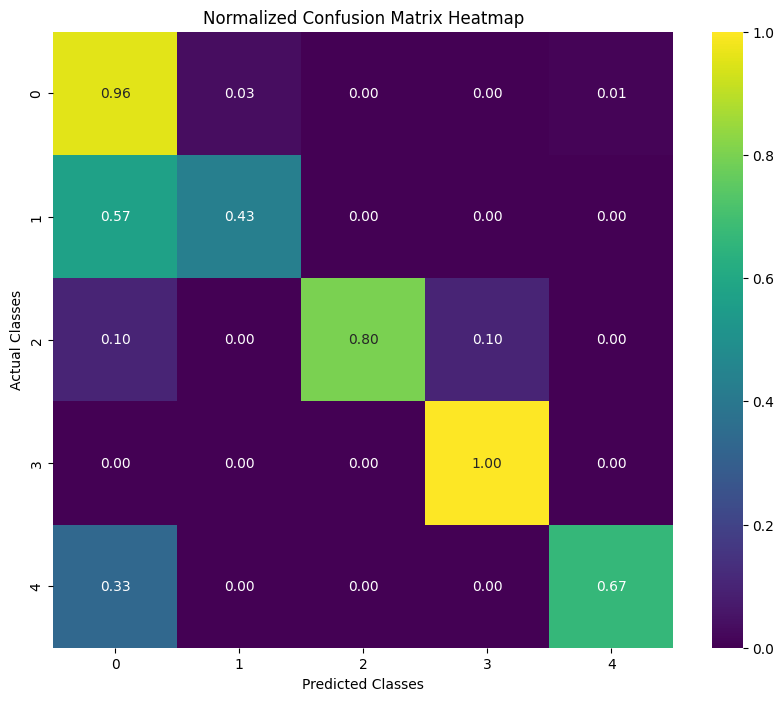

In [15]:
conf_matrix = confusion_matrix(Y_test, y_pred)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=np.round(conf_matrix_normalized, 2), fmt='.2f', cmap='viridis', 
            xticklabels=sorted(set(Y_test)), 
            yticklabels=sorted(set(Y_test)))

# Labels and title
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.title('Normalized Confusion Matrix Heatmap')
plt.show()

In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

Y = Y.to_numpy() if isinstance(Y, pd.Series) else Y
accuracies = []
f1_scores = []
precisions = []
recalls = []
kappas = []

fold_idx = 1
for train_idx, test_idx in cv.split(data_pca, Y):
    X_train, X_test = data_pca[train_idx], data_pca[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]
    
    stacking_clf.fit(X_train, y_train)
    y_pred = stacking_clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)

    accuracies.append(accuracy)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    kappas.append(kappa)

    print(f"Fold {fold_idx}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Cohen's Kappa: {kappa:.4f}\n")
    fold_idx += 1

print("Overall Results:")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}, Std Dev: {np.std(accuracies):.4f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.4f}, Std Dev: {np.std(f1_scores):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}, Std Dev: {np.std(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}, Std Dev: {np.std(recalls):.4f}")
print(f"Mean Cohen's Kappa: {np.mean(kappas):.4f}, Std Dev: {np.std(kappas):.4f}")

/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

Fold 1:
  Accuracy: 0.9500
  F1 Score: 0.9463
  Precision: 0.9517
  Recall: 0.9500
  Cohen's Kappa: 0.9125



/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

Fold 2:
  Accuracy: 0.9125
  F1 Score: 0.9025
  Precision: 0.9159
  Recall: 0.9125
  Cohen's Kappa: 0.8451



/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

Fold 3:
  Accuracy: 0.9125
  F1 Score: 0.9011
  Precision: 0.9042
  Recall: 0.9125
  Cohen's Kappa: 0.8419



/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

Fold 4:
  Accuracy: 0.8750
  F1 Score: 0.8686
  Precision: 0.8643
  Recall: 0.8750
  Cohen's Kappa: 0.7803



/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

Fold 5:
  Accuracy: 0.9500
  F1 Score: 0.9478
  Precision: 0.9475
  Recall: 0.9500
  Cohen's Kappa: 0.9122



/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

Fold 6:
  Accuracy: 0.9625
  F1 Score: 0.9527
  Precision: 0.9524
  Recall: 0.9625
  Cohen's Kappa: 0.9329



/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

Fold 7:
  Accuracy: 0.9500
  F1 Score: 0.9461
  Precision: 0.9511
  Recall: 0.9500
  Cohen's Kappa: 0.9117



/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

Fold 8:
  Accuracy: 0.9367
  F1 Score: 0.9277
  Precision: 0.9219
  Recall: 0.9367
  Cohen's Kappa: 0.8868



/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

Fold 9:
  Accuracy: 0.9620
  F1 Score: 0.9437
  Precision: 0.9265
  Recall: 0.9620
  Cohen's Kappa: 0.9315



/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

Fold 10:
  Accuracy: 0.9747
  F1 Score: 0.9743
  Precision: 0.9781
  Recall: 0.9747
  Cohen's Kappa: 0.9558

Overall Results:
Mean Accuracy: 0.9386, Std Dev: 0.0287
Mean F1 Score: 0.9311, Std Dev: 0.0298
Mean Precision: 0.9314, Std Dev: 0.0305
Mean Recall: 0.9386, Std Dev: 0.0287
Mean Cohen's Kappa: 0.8911, Std Dev: 0.0507
